# WeatherPy

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
for idx, city in enumerate(cities):
    print(f"Processing Record {idx + 1} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 | acarau
Processing Record 2 | pekan
Processing Record 3 | nizhneyansk
City not found. Skipping...
Processing Record 4 | cape town
Processing Record 5 | rikitea
Processing Record 6 | lavrentiya
Processing Record 7 | saldanha
Processing Record 8 | saint george
Processing Record 9 | butaritari
Processing Record 10 | pitimbu
Processing Record 11 | mataura
Processing Record 12 | ushuaia
Processing Record 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 | loyga
Processing Record 15 | san jose
Processing Record 16 | kapaa
Processing Record 17 | waipawa
Processing Record 18 | kaitangata
Processing Record 19 | margate
Processing Record 20 | half moon bay
Processing Record 21 | brae
Processing Record 22 | severo-kurilsk
Processing Record 23 | amahai
Processing Record 24 | hobart
Processing Record 25 | terrace
Processing Record 26 | avarua
Processing Record 27 | albany
Processing Recor

Processing Record 236 | barawe
City not found. Skipping...
Processing Record 237 | karratha
Processing Record 238 | indi
Processing Record 239 | mys shmidta
City not found. Skipping...
Processing Record 240 | najran
Processing Record 241 | karaul
City not found. Skipping...
Processing Record 242 | tumannyy
City not found. Skipping...
Processing Record 243 | taree
Processing Record 244 | tabiauea
City not found. Skipping...
Processing Record 245 | kapuskasing
Processing Record 246 | ulladulla
Processing Record 247 | de-kastri
Processing Record 248 | svetlogorsk
Processing Record 249 | pagudpud
Processing Record 250 | wangaratta
Processing Record 251 | udachnyy
Processing Record 252 | pevek
Processing Record 253 | pierre
Processing Record 254 | mersing
Processing Record 255 | salekhard
Processing Record 256 | khartoum
Processing Record 257 | aksarka
Processing Record 258 | santiago del estero
Processing Record 259 | saint-pierre
Processing Record 260 | fairbanks
Processing Record 261 | s

Processing Record 467 | ranipur
Processing Record 468 | ongandjera
Processing Record 469 | maldonado
Processing Record 470 | beringovskiy
Processing Record 471 | cairns
Processing Record 472 | kamiiso
Processing Record 473 | bambanglipuro
Processing Record 474 | allapalli
Processing Record 475 | te anau
Processing Record 476 | kargasok
Processing Record 477 | tiksi
Processing Record 478 | mackay
Processing Record 479 | coquimbo
Processing Record 480 | teahupoo
Processing Record 481 | sinkat
City not found. Skipping...
Processing Record 482 | miranorte
City not found. Skipping...
Processing Record 483 | kruisfontein
Processing Record 484 | zhezkazgan
Processing Record 485 | bakchar
Processing Record 486 | manado
Processing Record 487 | dholka
Processing Record 488 | ekhabi
Processing Record 489 | brownfield
Processing Record 490 | abalak
Processing Record 491 | safaqis
City not found. Skipping...
Processing Record 492 | lakselv
Processing Record 493 | aros
Processing Record 494 | annau


In [6]:
len(lat)
len(temp)

614

## Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [53]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Latitude      572
Longitude     572
Max Temp      572
Wind Speed    572
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,acarau,35.0,BR,1.579939e+09,100.0,-2.89,-40.12,77.00,3.36
1,pekan,40.0,MY,1.579939e+09,62.0,3.48,103.40,87.80,4.70
2,cape town,90.0,ZA,1.579939e+09,82.0,-33.93,18.42,72.00,10.29
3,rikitea,0.0,PF,1.579939e+09,77.0,-23.12,-134.97,78.49,14.23
4,lavrentiya,0.0,RU,1.579939e+09,75.0,65.58,-171.00,-16.08,2.68


## Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

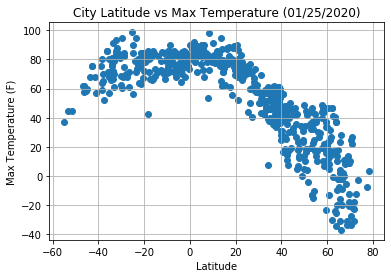

In [54]:
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (01/25/2020)')
plt.grid()
plt.savefig("./Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

### Latitude vs Humidity Plot

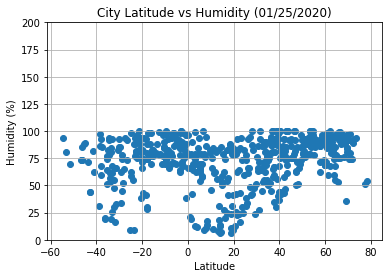

In [55]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (01/25/2020)')
plt.ylim(0, 200)
plt.grid()
plt.savefig("./Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

### Latitude vs Cloudiness Plot

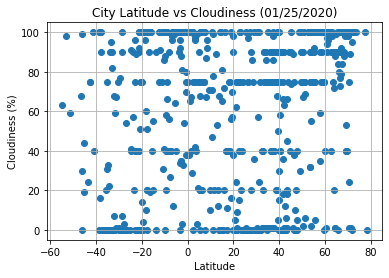

In [56]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (01/25/2020)')
plt.grid()
plt.savefig("./Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

### Latitude vs Wind Speed Plot

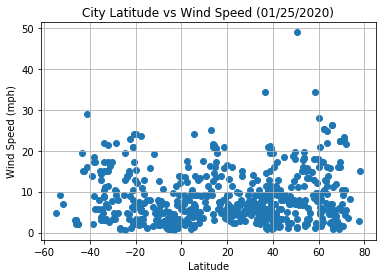

In [57]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (01/25/2020)')
plt.grid()
plt.savefig("./Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [58]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"./Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

    

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7848306511436577


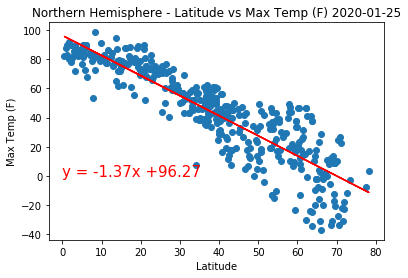

In [59]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1556213183310972


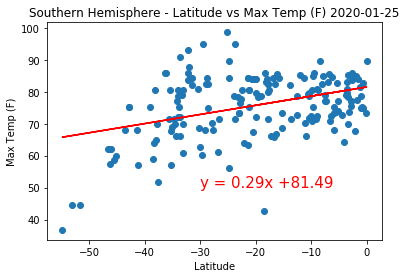

In [60]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20784563072846224


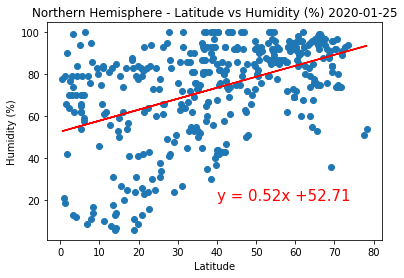

In [61]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20784563072846224


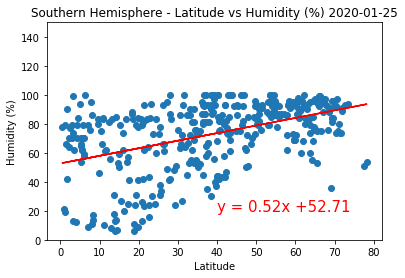

In [62]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Latitude']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.059421342937662575


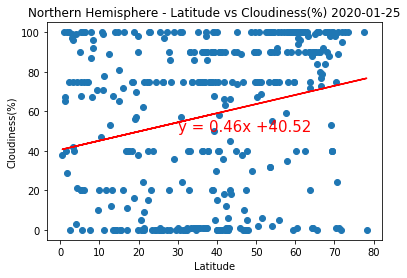

In [63]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11044649432714045


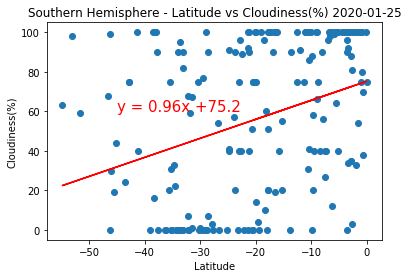

In [64]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012356775269041446


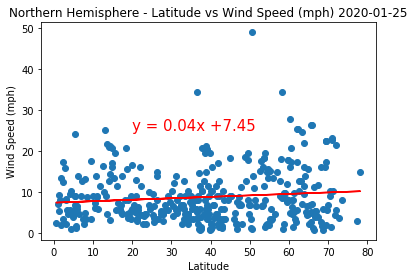

In [65]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08821029909136535


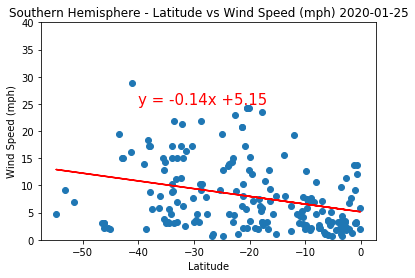

In [66]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)